In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# Sparse Hebbian Learning: testing the tools in the package

This notebook aims at show-casing the different tools implemented in the package.


In [3]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 4, 1

In [4]:
matname = 'test_tools'
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)

In [5]:
help(shl)

Help on SHL in module shl_scripts.shl_experiments object:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_width=12, patch_ds=4, N_patches=65536, datapath='../database/', name_database='laurent', n_dictionary=529, learning_algorithm='mp', fit_tol=None, do_precision=False, do_mask=True, l0_sparseness=15, one_over_F=True, n_iter=1025, eta=0.02, beta1=0.9, beta2=0.999, epsilon=1e-08, homeo_method='HEH', eta_homeo=0.05, alpha_homeo=0.5, C=5.0, nb_quant=256, P_cum=None, do_sym=False, seed=42, patch_norm=False, batch_size=1024, record_each=128, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, data_cache='data_cache')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  code(self, data, dico, coding_algorithm='mp', matname=None, P_cum=None, fit_tol=None, l0_s


## loading a database


Extracting data..(256, 256)
Photo2018-01-18_0440462510.jpg, Data is of shape : (10, 144) - done in 10.43s.


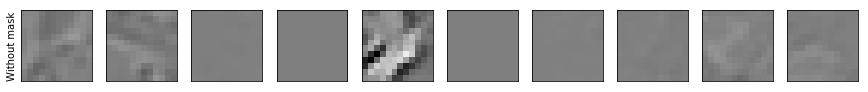

Extracting data..(256, 256)
Photo2018-01-18_0440462510.jpg, Data is of shape : (10, 144) - done in 11.18s.


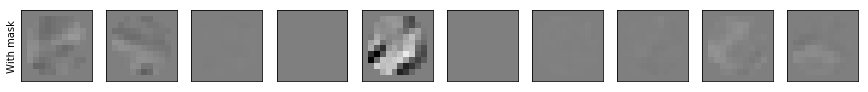

In [6]:
N_patches = 10
from shl_scripts.shl_tools import show_data

for i, (do_mask, label) in enumerate(zip([False, True], ['Without mask', 'With mask'])):
    data = SHL(DEBUG_DOWNSCALE=1, verbose=verbose, N_patches=N_patches, n_image=1, do_mask=do_mask).get_data()
    fig, axs = show_data(data)
    axs[0].set_ylabel(label);
    plt.show();

In [7]:
data = np.random.randn(32, 32, 200)
from skimage.transform import downscale_local_mean
patch_ds = 4
downscale_local_mean(data, (patch_ds, patch_ds, 1)).shape


(8, 8, 200)

In [8]:
data = shl.get_data(matname=matname)

Extracting data..loading the data called : data_cache/test_tools_data
Data is of shape : (20480, 169) - done in 0.06s.



## initializing the dictionary


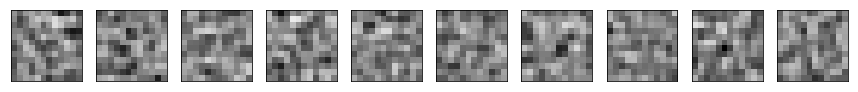

In [9]:
from shl_scripts.shl_tools import ovf_dictionary
data = ovf_dictionary(N_patches, n_pixels=shl.patch_width**2)
fig, axs = show_data(data);


## caching tools : loading a database


In [10]:
matname = 'test_tools'
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)

Let's first remove potential data cache:

In [11]:
!rm data_cache/{matname}*

If the data cache does not exist (as a file), it creates it:

In [12]:
data = shl.get_data(matname=matname)

Extracting data..No cache found data_cache/test_tools_data: Extracting data... Extracting data..Photo2018-01-18_0440462510.jpg, Photo2018-01-18_0309392473.jpg, Photo2018-01-18_0343102547.jpg, Photo2018-02-18_0911262631 square.jpg, Photo2018-01-18_0327052545.jpg, Photo2018-01-18_0440352508.jpg, Photo2018-01-18_0230432458.jpg, Photo2018-01-18_0316462527.jpg, Photo2018-01-18_0553172551.jpg, Photo2018-01-18_0423102502.jpg, Photo2018-01-18_0422432500.jpg, Photo2018-01-18_0441022511.jpg, Data is of shape : (16380, 144) - done in 151.62s.
Data is of shape : (16380, 144) - done in 151.74s.


But if the data cache exists, it loads it:

In [13]:
data = shl.get_data(matname=matname)

Extracting data..loading the data called : data_cache/test_tools_data
Data is of shape : (16380, 144) - done in 0.03s.



## caching tools : learning, then reloading the dictionary


If the dictionary does not exist (as a file), it learns it:

No cache found data_cache/test_tools_dico.pkl: Learning the dictionary with algo = mp 
 Training on 16380 patches
[dict_learning] Iteration   1 /   129 (elapsed time:   6s,   0mn   6s)
Iteration  33 /   129 (elapsed time:  204s,   3mn  24s)
Iteration  65 /   129 (elapsed time:  388s,   6mn  28s)
Iteration  97 /   129 (elapsed time:  568s,   9mn  28s)
Iteration  129 /   129 (elapsed time:  737s,  12mn  17s)
done in 743.43s.


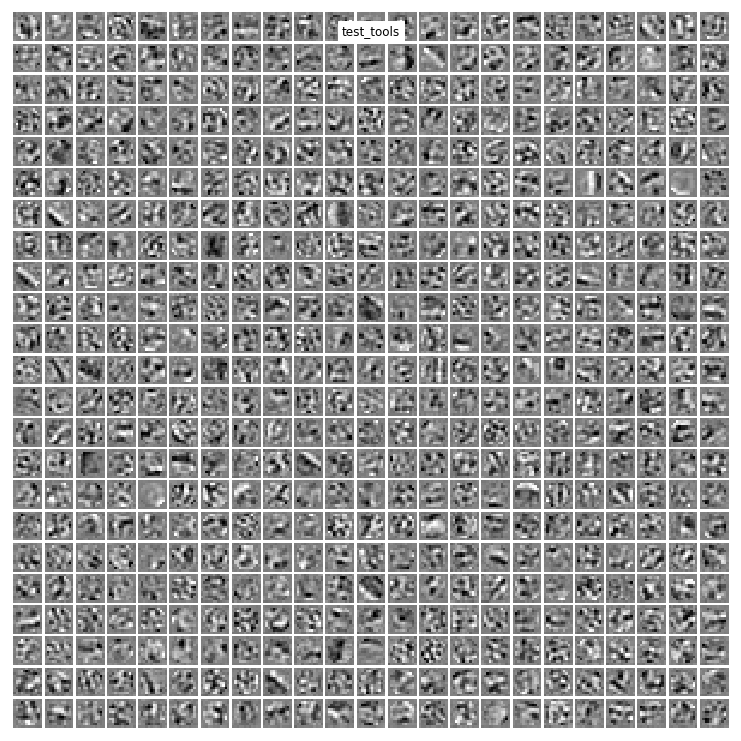

In [14]:
list_figures = ['show_dico']
shl.n_iter = 129
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

But if the dictionary exists, it loads it:

loading the dico called : data_cache/test_tools_dico.pkl


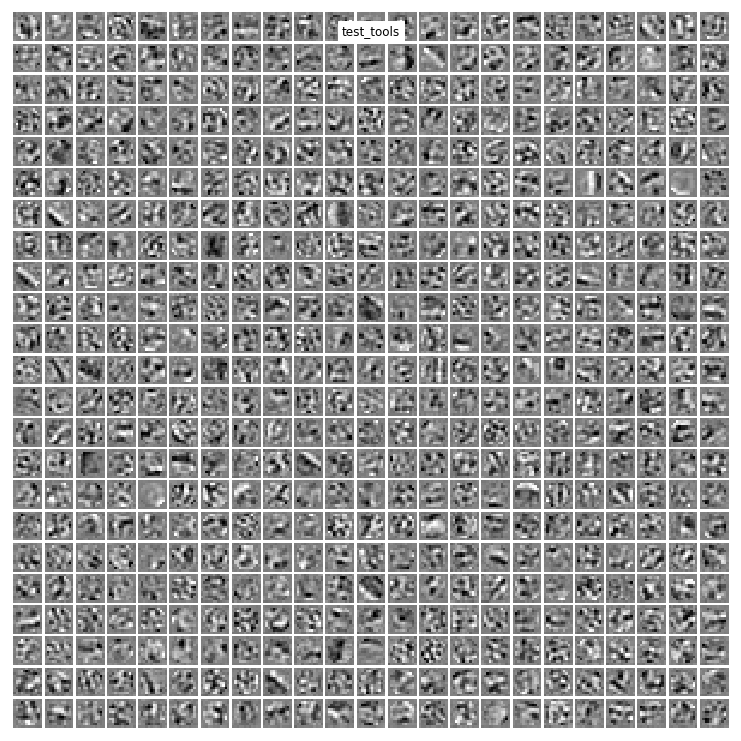

In [15]:
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)


## caching tools : resuming a learning

If we give a dictionary as an argument to the learning method, then we resume the learning from this dictionary and overwrite the data cache.


loading the dico called : data_cache/test_tools_dico.pkl
resuming the learning on : data_cache/test_tools_dico.pkl
Training on 16380 patches
[dict_learning] Iteration   1 /   129 (elapsed time:   5s,   0mn   5s)
Iteration  33 /   129 (elapsed time:  175s,   2mn  55s)
Iteration  65 /   129 (elapsed time:  342s,   5mn  42s)
Iteration  97 /   129 (elapsed time:  510s,   8mn  30s)
Iteration  129 /   129 (elapsed time:  679s,  11mn  19s)
done in 683.99s.


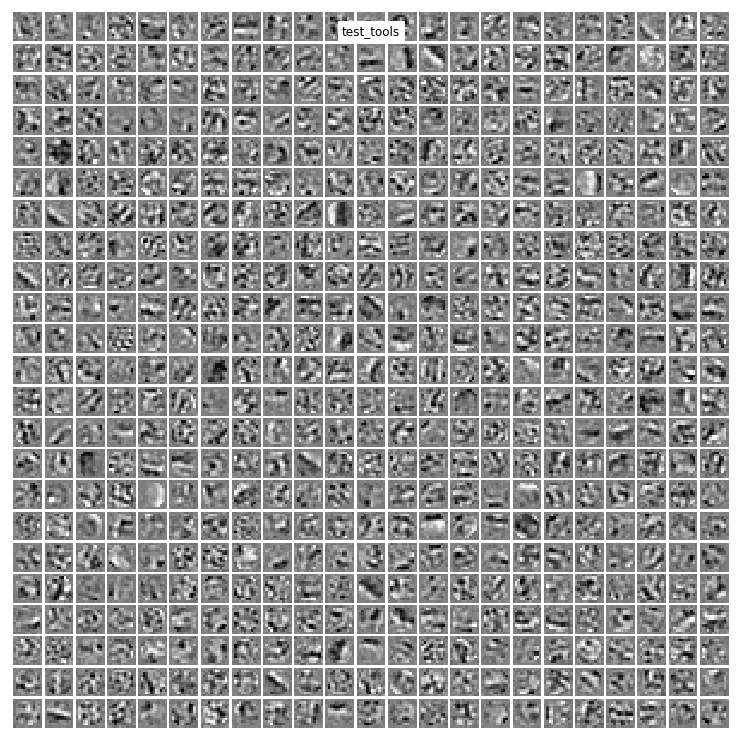

In [16]:
dico = shl.learn_dico(data=data, matname=matname, dictionary=dico.dictionary, list_figures=list_figures)


## caching tools : coding


In [17]:
%%time
sparse_code = shl.code(data, dico)

Coding data with algorithm  mp CPU times: user 3.11 s, sys: 1.14 s, total: 4.25 s
Wall time: 8.67 s


In [18]:
sparse_code = shl.code(data, dico, matname=matname)

No cache found data_cache/test_tools_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp 

## plotting tools

The simplest solution is to pass a list of figures to the learning method:

In [19]:
df_variable = dico.record['kurt']

In [20]:
df_variable.ndim

1

Extracting data..loading the data called : data_cache/test_tools_data
Data is of shape : (16380, 144) - done in 0.03s.
loading the dico called : data_cache/test_tools_dico.pkl


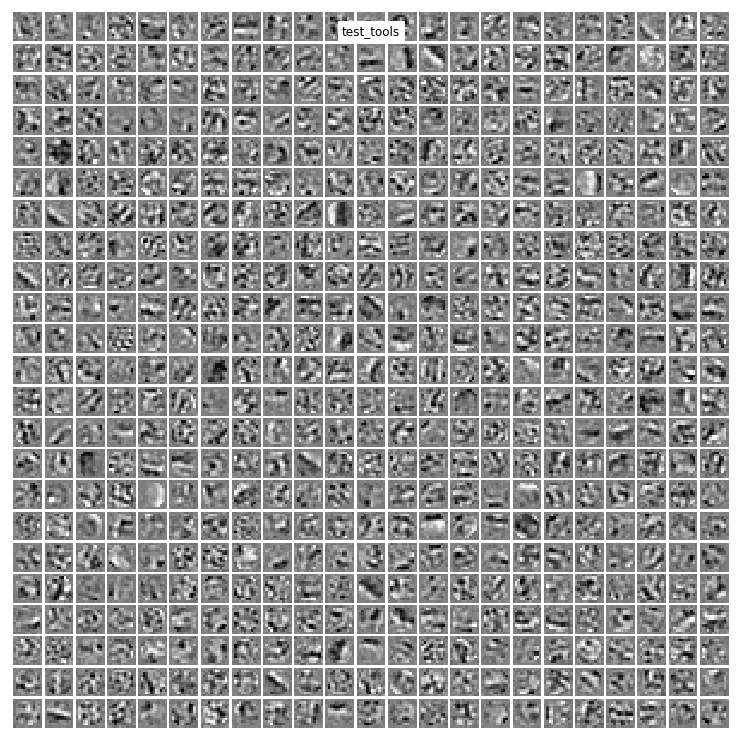

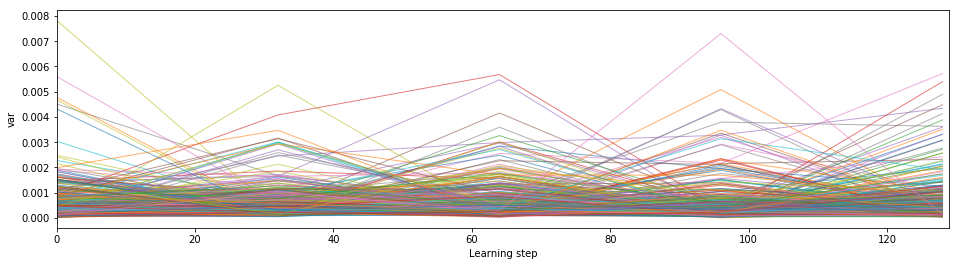

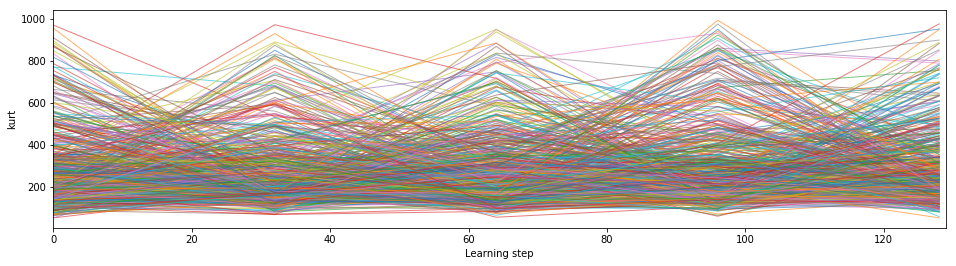

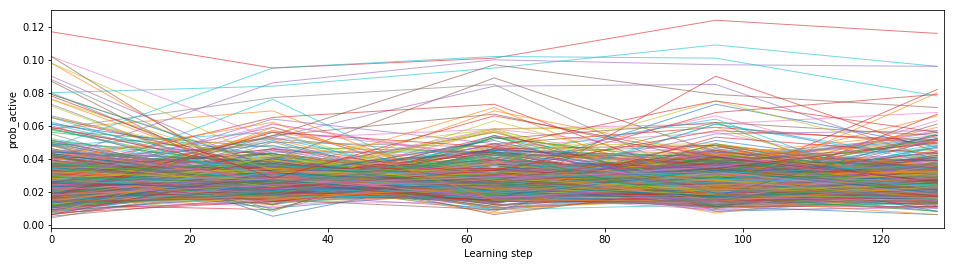

In [21]:
list_figures = ['show_dico',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
dico = shl.learn_dico(matname=matname, list_figures=list_figures)

But one can also generate every single figure independently:

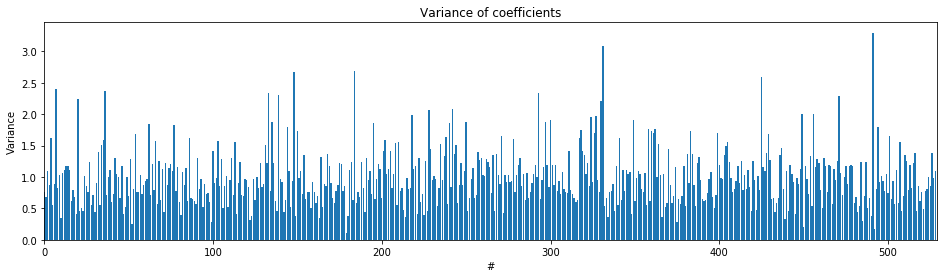

In [22]:
shl.plot_variance(sparse_code);

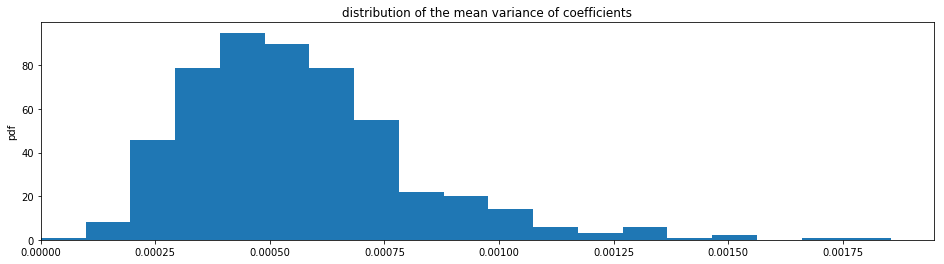

In [23]:
shl.plot_variance_histogram(sparse_code);

Training on 16380 patches
[dict_learning] Iteration   1 /   129 (elapsed time:   5s,   0mn   5s)
Iteration  33 /   129 (elapsed time:  260s,   4mn  20s)
Iteration  65 /   129 (elapsed time:  444s,   7mn  24s)
Iteration  97 /   129 (elapsed time:  633s,  10mn  33s)
Iteration  129 /   129 (elapsed time:  813s,  13mn  33s)
done in 818.27s.


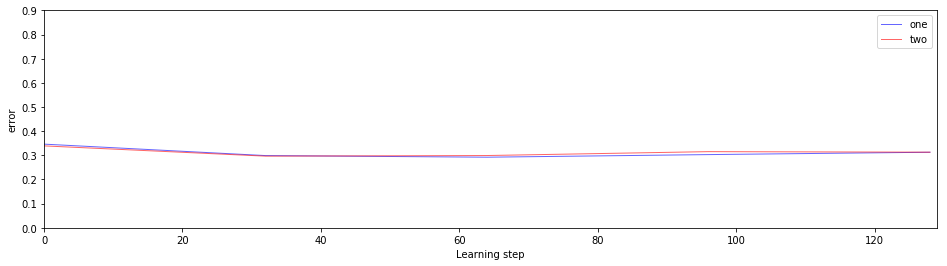

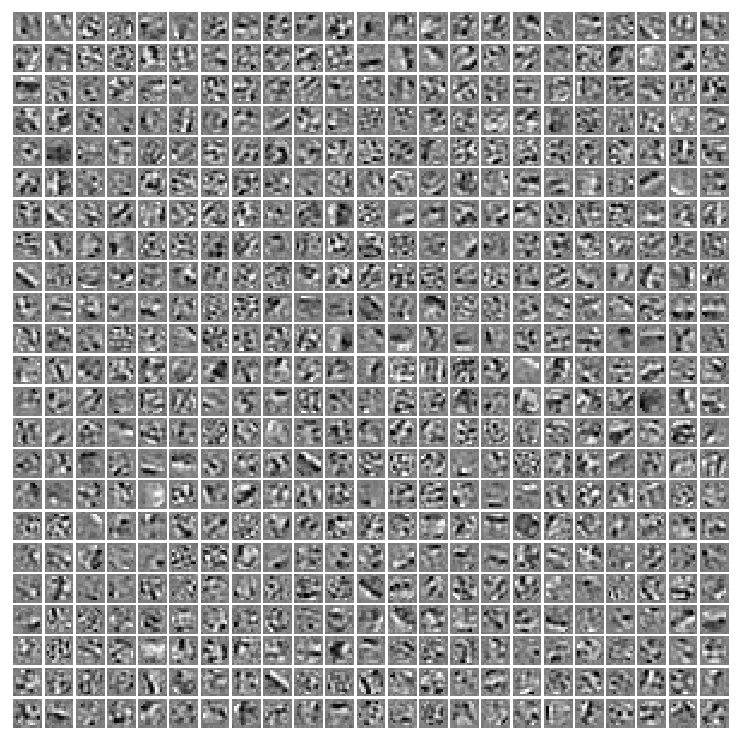

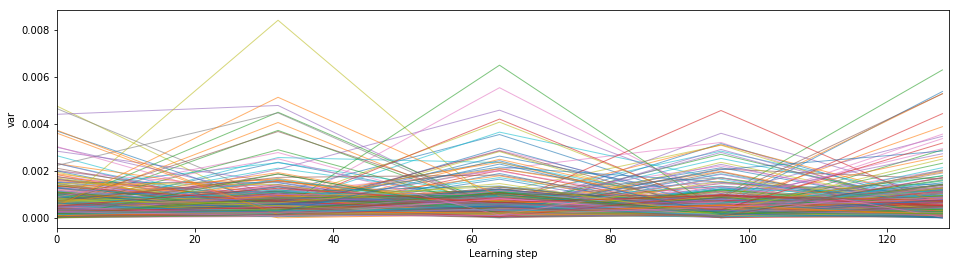

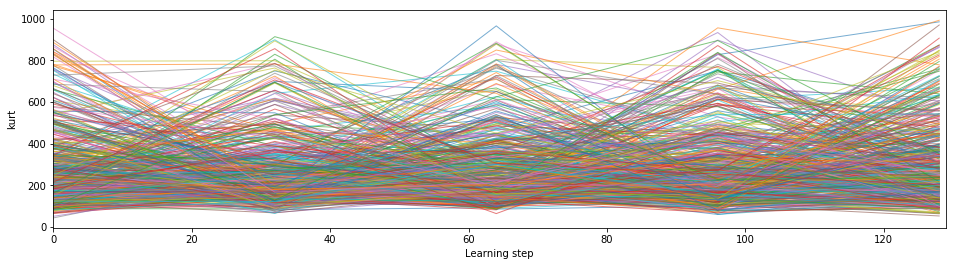

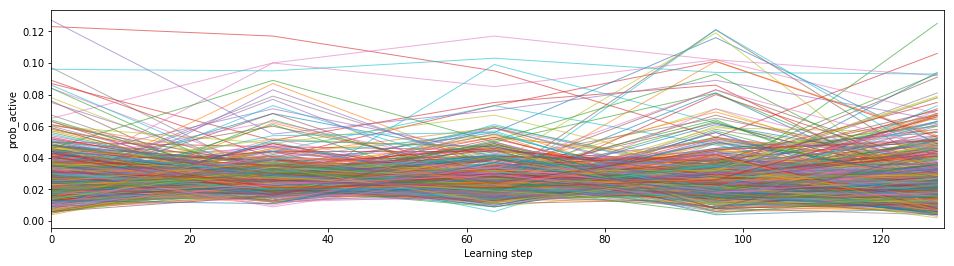

In [24]:
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico, variable='error', fig=fig_error, ax=ax_error, color='blue', label='one');
dico = shl.learn_dico(data=data, dictionary=dico.dictionary, matname=None, list_figures=list_figures)
fig_error, ax_error = shl.time_plot(dico, variable='error', fig=fig_error, ax=ax_error, color='red', label='two');
ax_error.set_ylim(0, .9)
ax_error.legend(loc='best');

And combine them:

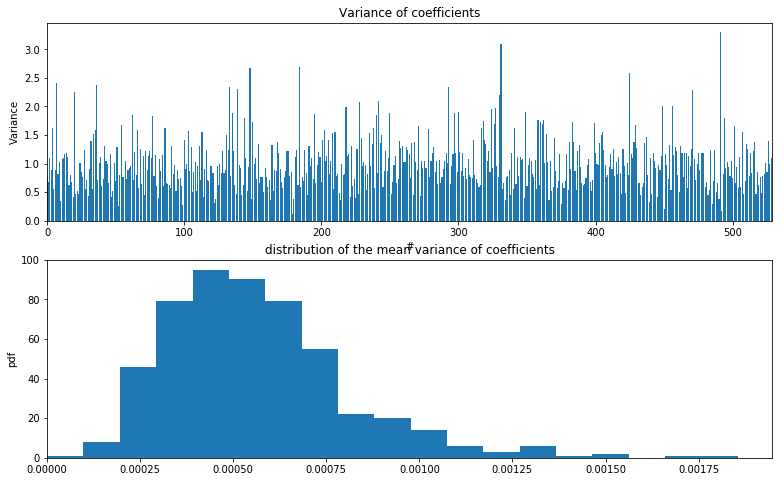

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(13, 8))
fig, axs[0] = shl.plot_variance(sparse_code, fig=fig, ax=axs[0])
fig, axs[1] = shl.plot_variance_histogram(sparse_code, fig=fig, ax=axs[1])

## Version used

In [26]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
Fri Feb 23 13:37:28 2018 CET